In [30]:
# %matplotlib notebook
from matplotlib import pyplot as plt
import numpy as np
from numpy import linspace,sin,cos,log,exp
import math as m
from math import sqrt,pi,e,exp
from random import random as rand

## local files
from physconsts import *
from rbconsts import *

In [ ]:
# this is the notebook test for rbensemble class

In [31]:
## classes 

class RbEnsemble:
    """ Ensemble of Rb atoms with a momentum distribution specified
        by temperature. Optional spatial distribution.
        
        'T'= temperature
        'size'= number of atoms
        'xdist': optional parameter specifying the initial
            position distribution
    """
    global mRb
    
    
    def __init__(self,T,size=None,xdist=None):
        
        # For efficiency, pre-generate a specified number of atoms
        if size is not None:
            self.size = size
            self.temp = T
            self.v = self.sampling_maxboltzv(self.size,[0,1],self.temp) # rms
            self.p = mRb*self.v # rms
            self.x = np.empty(self.size)
            if xdist is None:
                self.x = np.zeros(self.size)
            elif xdist is 'normal':
                self.x = np.random.normal(0,size=self.size)
        else:
            self.size = 0
            self.temp = T
            self.v = np.array([]) # rms
            self.p = np.array([]) # rms
            self.x = np.array([])
            
    def phasespace(self):
        """ Plots the ensemble in phase space. 1D x and p only for 
            now.
        """
        xmax = max(self.x) # like xmas but better
        xmin = min(self.x) # because i said so
        dx = xmax-xmin
        
        pmax = max(self.p)/mRb
        pmin = min(self.p)/mRb
        dp = pmax-pmin
        
        fig, ax = plt.subplots()
        ax.scatter(self.p/mRb,self.x)#,linestyle=None)
        ax.set(xlabel='p [m/(s mRb)]', ylabel='r [arb]',
               xlim=(pmin-.1*dp,pmax+.1*dp),
               ylim=(xmin-.1*dx,xmax*+.1*dx))
        plt.show()
        
    def vpt(self):
        """ Return a speed from Maxwell-Boltzmann dist. """
        return sampling_maxboltzv(1,[0,1],self.temp)
    
    def xpt(self,domain):
        """ Return a position from a flat dist by default. """
        
        x1,x2 = domain
        x = rand()*(x2-x1) # only works for x1,x2 > 0
        return x
    
    def maxboltzv(self,T,v,normalization=False):
        """ Maxwell-Boltzmann distribution of speeds for 3-dimensional
            gas. Returns f(v) for T. """
        global kB,mRb
        m = mRb

        A = 4*pi*(m/(2*pi*kB*T))**(3/2) # normalization consts
        meanv = sqrt(2*kB*T/m) # the maximum occurs at the mean

        if normalization is True:
            return A
        else:
            return A*v**2*exp(-m*v**2/(2*kB*T))

    def sampling_maxboltzv(self,size,domain,T,vectorial=False,showplot=False):
        """ Sample random speeds with a Maxwell-Boltzmann dist. 
            'size': sample size
            'domain': [v1,v2] the restricted domain of the pdf; e.g.
                a Guassian goes to zero well before inf so we could
                let the domain be a finite region
            'T': temperature
            'vectorial': 
                If False, only return a scalar. 
                Set to True to return velocity vectors with a 
                direction from a flat distribution. 
        """
        global kB,mRb
        m = mRb

        n = size 
        v1,v2 = domain

        mean = sqrt(2*kB*T/m)
        fmax = self.maxboltzv(T,mean) # the maximum
        y_dist = np.empty(n) 
        f_dist = np.empty(n) 
        v_dist = np.empty(n) # this is the distribution we want
        j = 0 # dist index
        while j < n:
            v = (v2-v1)*rand() # rand val on domain of f(x)
            f = self.maxboltzv(T,v)
            y = rand()*fmax # rand val on range of f(x)
            if y <= f:
                y_dist[j]=y
                f_dist[j]=f
                v_dist[j]=v # x vals with approximate gaussian pdf
                j+=1

        # plot distribution as a check:
        if showplot is not False:
            plt.scatter(v_dist,y_dist,c='red',s=10)
            plt.scatter(v_dist,f_dist,c='blue',s=10)
            plt.show()

        return v_dist

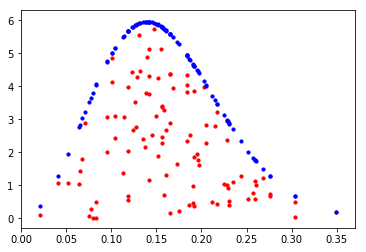

array([0.11861365, 0.06790059, 0.1562874 , 0.19565178, 0.21500615,
       0.09518817, 0.22483303, 0.14981109, 0.16542606, 0.08369647,
       0.10060856, 0.12659357, 0.1274436 , 0.19209103, 0.17520392,
       0.25885296, 0.18726495, 0.14720666, 0.16527697, 0.26800541,
       0.15873203, 0.04080301, 0.18421778, 0.16121461, 0.34894907,
       0.16479284, 0.2281704 , 0.18390584, 0.1356269 , 0.24371078,
       0.23078709, 0.10081071, 0.14164439, 0.0772521 , 0.13246848,
       0.155776  , 0.02119118, 0.17335914, 0.13784004, 0.14536879,
       0.19223812, 0.12911353, 0.05172476, 0.260036  , 0.20556166,
       0.25748316, 0.25926131, 0.09570602, 0.20498785, 0.16870753,
       0.14214219, 0.1840922 , 0.15660967, 0.11275385, 0.06395923,
       0.16548119, 0.08337083, 0.07512458, 0.10419177, 0.19197178,
       0.06500712, 0.07084624, 0.1305291 , 0.19678744, 0.25193474,
       0.19495639, 0.30386473, 0.22911284, 0.11372654, 0.07938771,
       0.2023274 , 0.14181154, 0.11878865, 0.1523733 , 0.30339

In [32]:
# maxwboltz test
atoms = RbEnsemble(1) # the temp here actually doesn't matter
atoms.sampling_maxboltzv(100,[0,1],.000100,showplot=True)

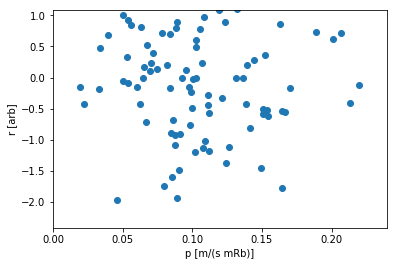

In [33]:
# RbEnsemble test
atoms = RbEnsemble(5e-5,100,xdist='normal')
atoms.phasespace()